#### XGBoost yerine bi tik daha performansli ve level-wise yerine leaf wise buyume stratejisi

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)
warnings.filterwarnings("ignore",category = FutureWarning)

In [8]:
df = pd.read_csv("diabetes.csv")

In [11]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

In [14]:
X_train, X_test , y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.30,
                                                     random_state = 42)

In [18]:
!pip install lightgbm

In [20]:
from lightgbm import LGBMClassifier

In [24]:
lgbm = LGBMClassifier().fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [26]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [28]:
y_pred = lgbm.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.7229437229437229

In [32]:
lgbm = LGBMClassifier()

In [34]:
lgbm_params = {"learning_rate" : [0.001,0.01,0.1],
               "n_estimators" : [200,500,1000],
               "max_depth" : [1,3,5,8]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=10,verbose=2 , n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[LightGBM] [Info] Number of positive: 169, number of negative: 314
[LightGBM] [Info] Number of positive: 169, number of negative: 315
[LightGBM] [Info] Number of positive: 169, number of negative: 314
[LightGBM] [Info] Number of positive: 169, number of negative: 314
[LightGBM] [Info] Number of positive: 169, number of negative: 314
[LightGBM] [Info] Number of positive: 170, number of negative: 314
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572[LightGBM] [Info] Total Bins 573

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003431 seconds.
You can set `force_col_wise=true` to remo

In [39]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [41]:
lgbm_tuned = LGBMClassifier(learning_rate = 0.01 , max_depth = 1 , n_estimators = 500).fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [43]:
y_pred = lgbm_tuned.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.7575757575757576

# CatBoost

In [50]:
from catboost import CatBoostClassifier

In [52]:
catb_model  = CatBoostClassifier().fit(X_train,y_train, verbose = False)

In [54]:
y_pred = catb_model.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.7402597402597403

In [58]:
catb = CatBoostClassifier()

In [60]:
catb_params =  {"iterations" : [200,500,1000],
                "learning_rate" : [0.01,0.03,0.1],
                "depth" : [4,5,8]}
               

In [62]:
catb_cv_model = GridSearchCV(catb,catb_params,cv=3 ,n_jobs = -1 , verbose = 2 ).fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 0.6766978	total: 56.9ms	remaining: 11.3s
1:	learn: 0.6642609	total: 57.3ms	remaining: 5.67s
2:	learn: 0.6476240	total: 57.6ms	remaining: 3.78s
3:	learn: 0.6342932	total: 57.9ms	remaining: 2.84s
4:	learn: 0.6265813	total: 58.4ms	remaining: 2.28s
5:	learn: 0.6186202	total: 58.9ms	remaining: 1.9s
6:	learn: 0.6084328	total: 59.1ms	remaining: 1.63s
7:	learn: 0.5981215	total: 59.4ms	remaining: 1.43s
8:	learn: 0.5901267	total: 59.7ms	remaining: 1.27s
9:	learn: 0.5829709	total: 60ms	remaining: 1.14s
10:	learn: 0.5724571	total: 60.3ms	remaining: 1.03s
11:	learn: 0.5656742	total: 60.6ms	remaining: 949ms
12:	learn: 0.5576240	total: 60.9ms	remaining: 876ms
13:	learn: 0.5510802	total: 61.2ms	remaining: 812ms
14:	learn: 0.5434481	total: 61.4ms	remaining: 758ms
15:	learn: 0.5384483	total: 61.7ms	remaining: 710ms
16:	learn: 0.5331712	total: 62ms	remaining: 667ms
17:	learn: 0.5290364	total: 62.4ms	remaining: 631ms
18:	learn: 0.52434

In [64]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 1000, 'learning_rate': 0.03}

In [68]:
catb_tuned= CatBoostClassifier(depth=8 , iterations = 1000 , learning_rate = 0.03).fit(X_train,y_train)

0:	learn: 0.6730317	total: 3.88ms	remaining: 3.87s
1:	learn: 0.6582931	total: 6.2ms	remaining: 3.1s
2:	learn: 0.6413374	total: 8.42ms	remaining: 2.8s
3:	learn: 0.6267884	total: 10.4ms	remaining: 2.6s
4:	learn: 0.6150338	total: 12.2ms	remaining: 2.42s
5:	learn: 0.5988570	total: 13.7ms	remaining: 2.27s
6:	learn: 0.5860830	total: 15.2ms	remaining: 2.16s
7:	learn: 0.5734709	total: 16.7ms	remaining: 2.07s
8:	learn: 0.5616036	total: 18.1ms	remaining: 1.99s
9:	learn: 0.5507408	total: 19.1ms	remaining: 1.89s
10:	learn: 0.5388119	total: 20.2ms	remaining: 1.81s
11:	learn: 0.5264274	total: 21.4ms	remaining: 1.76s
12:	learn: 0.5191433	total: 22.5ms	remaining: 1.71s
13:	learn: 0.5104236	total: 23.8ms	remaining: 1.68s
14:	learn: 0.5016788	total: 24.9ms	remaining: 1.63s
15:	learn: 0.4954697	total: 26.1ms	remaining: 1.61s
16:	learn: 0.4896571	total: 27.6ms	remaining: 1.59s
17:	learn: 0.4808284	total: 29.1ms	remaining: 1.59s
18:	learn: 0.4723730	total: 30.3ms	remaining: 1.56s
19:	learn: 0.4656953	total

In [70]:
y_pred = catb_tuned.predict(X_test)

In [72]:
accuracy_score(y_pred,y_test)

0.7316017316017316

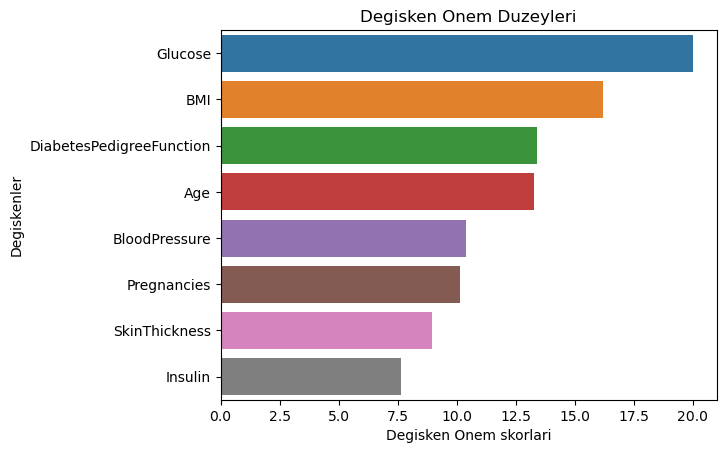

In [75]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel("Degisken Onem skorlari")
plt.ylabel("Degiskenler")
plt.title("Degisken Onem Duzeyleri")
plt.show()              